# Uncertainties in Maximum Likelihood Method
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Define MC experiment

Estimate of mean and sigma from 10 measurements

In [2]:
Np = 10
x0 = 1
sigma0 = 2


def mcexp(Npt=10):
    vec = np.random.normal(x0, sigma0, size=(Npt))
    return [np.mean(vec), np.std(vec)]

### (2) Generate experiments and fill result distributions

In [3]:
# Number of generations

Nmc = 1000000

Xval = np.empty(Nmc)
Sval = np.empty(Nmc)

# Generate experiments

for itry in range(Nmc):
    myexp = mcexp(Np)
    Xval[itry] = myexp[0]
    Sval[itry] = myexp[1]

### (3) Plot results

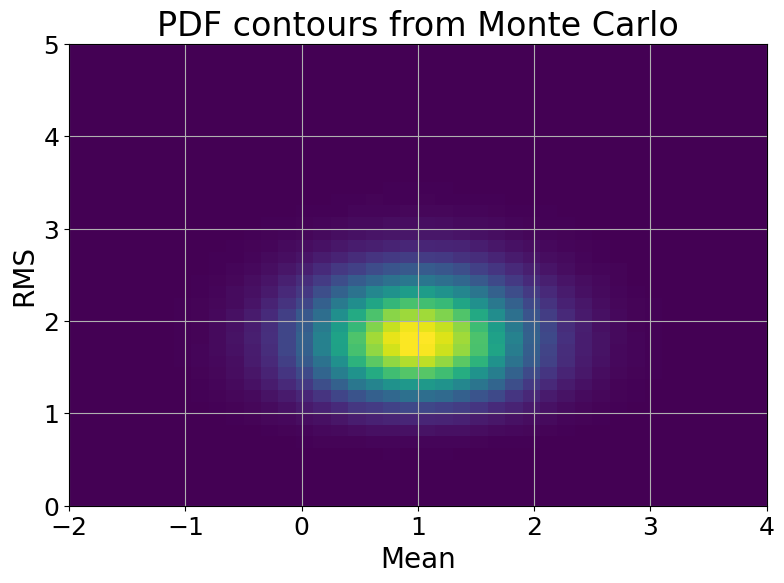

In [4]:
# Create result histograms

Xmin = -2
Xmax = 4
Nxbin = 40

Smin = 0.0
Smax = 5.0
Nsbin = 40

plt.figure(figsize=(9, 6))

counts, ybins, xbins, image = plt.hist2d(
    Xval, Sval, bins=[Nxbin, Nsbin], range=[[Xmin, Xmax], [Smin, Smax]]
)

plt.title("PDF contours from Monte Carlo", size=24)
plt.ylabel("RMS", size=20)
plt.xlabel("Mean", size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which="major", axis="both")

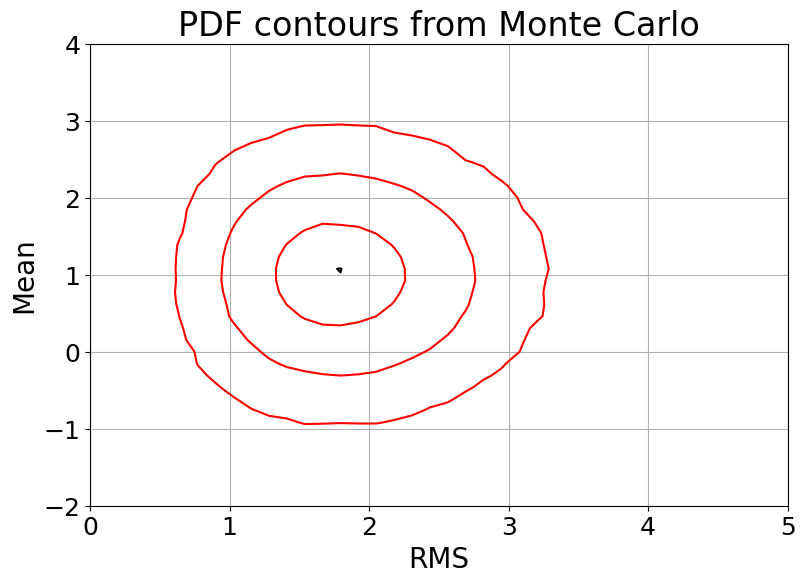

In [5]:
Cmax = np.max(counts)

plt.figure(figsize=(9, 6))

lcounts = np.log(counts + 0.1)
Cmax = np.max(lcounts)

plt.contour(
    lcounts,
    extent=[xbins.min(), xbins.max(), ybins.min(), ybins.max()],
    levels=[Cmax - 4.5, Cmax - 2.0, Cmax - 0.5, Cmax - 0.002],
    colors=["#FF0000", "#FF0000", "#FF0000", "#000000"],
)

plt.title("PDF contours from Monte Carlo", size=24)
plt.xlabel("RMS", size=20)
plt.ylabel("Mean", size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which="major", axis="both")

fname = "06_mlm_mc_2d.png"
plt.savefig(fname)